In [44]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [45]:
nRowsRead = 500000
#nRowsRead = None
df1 = pd.read_csv("data/Chicago_Crimes_2001_to_2004.csv", delimiter=',', nrows = nRowsRead)
df2 = pd.read_csv("data/Chicago_Crimes_2005_to_2007.csv", delimiter=',', nrows = nRowsRead)
df3 = pd.read_csv("data/Chicago_Crimes_2008_to_2011.csv", delimiter=',', nrows = nRowsRead)
df4 = pd.read_csv("data/Chicago_Crimes_2012_to_2017.csv", delimiter=',', nrows = nRowsRead)

dataframe = []
dataframe.append(df1)
dataframe.append(df2)
dataframe.append(df3)
dataframe.append(df4)

In [46]:
result = pd.concat(dataframe, ignore_index=True)


In [47]:
result = result.drop([result.columns[0],'ID','District','Case Number','IUCR',
             'Description','FBI Code','X Coordinate', 'Y Coordinate', 'Latitude','Longitude', 'Ward'], axis = 1)
result

,Date,Block,Primary Type,Location Description,Arrest,Domestic,Beat,Community Area,Year,Updated On,Location
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,RESIDENCE,False,False,424,46.0,2004,08/17/2015 03:03:40 PM,NaN
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,RESIDENCE,False,True,935,61.0,2003,04/15/2016 08:55:02 AM,"(41.817229156, -87.637328162)"
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False,1413,22.0,2004,08/17/2015 03:03:40 PM,NaN
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,OTHER,False,False,2521,20.0,2004,08/17/2015 03:03:40 PM,NaN
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,RESIDENCE,False,False,2233,49.0,2003,04/15/2016 08:55:02 AM,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...
1999995,04/26/2013 10:25:00 AM,0000X W CTA 95TH ST LN,DECEPTIVE PRACTICE,CTA PLATFORM,False,False,634,49.0,2013,02/04/2016 06:33:39 AM,"(41.722768379, -87.624410361)"
1999996,04/26/2013 12:07:00 PM,071XX S EMERALD AVE,NARCOTICS,ALLEY,True,False,732,68.0,2013,02/04/2016 06:33:39 AM,"(41.764268496, -87.643003179)"
1999997,04/26/2013 06:15:00 AM,131XX S BALTIMORE AVE,NARCOTICS,RESIDENCE,True,False,433,55.0,2013,02/04/2016 06:33:39 AM,"(41.656764077, -87.547138923)"
1999998,04/26/2013 02:00:00 AM,005XX N RIDGEWAY AVE,THEFT,STREET,False,False,1122,23.0,2013,02/04/2016 06:33:39 AM,"(41.890781894, -87.719841858)"


In [49]:
result = result.dropna()
from datetime import *
result['Date'] = pd.to_datetime(result['Date'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%d/%m/%Y %H:%M:%S')
result

,Date,Block,Primary Type,Location Description,Arrest,Domestic,Beat,Community Area,Year,Updated On,Location
1,01/03/2003 00:00:00,004XX W 42ND PL,OTHER OFFENSE,RESIDENCE,False,True,935,61.0,2003,04/15/2016 08:55:02 AM,"(41.817229156, -87.637328162)"
4,01/05/2003 01:00:00,111XX S NORMAL AVE,THEFT,RESIDENCE,False,False,2233,49.0,2003,04/15/2016 08:55:02 AM,"(41.691784636, -87.635115968)"
6,01/01/2001 11:00:00,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,RESIDENCE,True,True,531,50.0,2001,08/29/2006 03:46:28 AM,"(41.687020002, -87.60844523)"
7,15/03/2003 00:00:00,090XX S RACINE AVE,OTHER OFFENSE,RESIDENCE PORCH/HALLWAY,False,False,2222,73.0,2003,04/15/2016 08:55:02 AM,"(41.729712374, -87.653158513)"
9,01/01/2003 00:00:00,009XX S SPAULDING AVE,THEFT,RESIDENCE,False,False,1134,29.0,2003,04/15/2016 08:55:02 AM,"(41.869772159, -87.708180162)"
...,...,...,...,...,...,...,...,...,...,...,...
1999995,26/04/2013 10:25:00,0000X W CTA 95TH ST LN,DECEPTIVE PRACTICE,CTA PLATFORM,False,False,634,49.0,2013,02/04/2016 06:33:39 AM,"(41.722768379, -87.624410361)"
1999996,26/04/2013 12:07:00,071XX S EMERALD AVE,NARCOTICS,ALLEY,True,False,732,68.0,2013,02/04/2016 06:33:39 AM,"(41.764268496, -87.643003179)"
1999997,26/04/2013 06:15:00,131XX S BALTIMORE AVE,NARCOTICS,RESIDENCE,True,False,433,55.0,2013,02/04/2016 06:33:39 AM,"(41.656764077, -87.547138923)"
1999998,26/04/2013 02:00:00,005XX N RIDGEWAY AVE,THEFT,STREET,False,False,1122,23.0,2013,02/04/2016 06:33:39 AM,"(41.890781894, -87.719841858)"


In [50]:
result.to_csv('python_preprocess.csv')

In [64]:
# df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [65]:
# df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [66]:
# df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,385233.000000,385184.000000,9.794130e+05,9.794130e+05,1000000.000000,979413.000000,979413.000000
mean,4.052188e+06,1.956701e+06,1223.581307,11.370641,22.528060,37.063110,1.164566e+06,1.886814e+06,2001.548352,41.845015,-87.671595
std,4.180868e+05,4.651070e+05,709.595199,6.992318,14.005916,21.521864,1.620966e+04,3.151844e+04,0.562859,0.086689,0.058919
min,8.790000e+02,6.340000e+02,111.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,2001.000000,36.619446,-91.686566
25%,3.790324e+06,1.634058e+06,624.000000,6.000000,10.000000,23.000000,1.153359e+06,1.860657e+06,2001.000000,41.773071,-87.712274
50%,4.098186e+06,1.947189e+06,1121.000000,10.000000,22.000000,32.000000,1.165945e+06,1.891334e+06,2002.000000,41.857468,-87.666260
75%,4.352438e+06,2.260187e+06,1821.000000,17.000000,34.000000,56.000000,1.176264e+06,1.910218e+06,2002.000000,41.909560,-87.628849
max,4.603228e+06,1.053707e+07,2535.000000,25.000000,50.000000,77.000000,1.205119e+06,1.951622e+06,2004.000000,42.022910,-87.524532


In [67]:
# df.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         7
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    614767
Community Area          614816
FBI Code                     0
X Coordinate             20587
Y Coordinate             20587
Year                         0
Updated On                   0
Latitude                 20587
Longitude                20587
Location                 20587
dtype: int64

In [68]:
# df = df.drop(['Unnamed: 0', 'Domestic','Beat','District','Case Number','IUCR','Description','Community Area','FBI Code','X Coordinate', 'Y Coordinate', 'Updated On'], axis = 1)
# df = df.dropna()

In [81]:
# d=df.groupby('Primary Type').sum()["Arrest"]
# d

Primary Type
ARSON                                 121
ASSAULT                              5725
BATTERY                             16539
BURGLARY                             1343
CRIM SEXUAL ASSAULT                   297
CRIMINAL DAMAGE                      3320
CRIMINAL TRESPASS                    8000
DECEPTIVE PRACTICE                   2775
GAMBLING                              780
HOMICIDE                             1024
INTERFERENCE WITH PUBLIC OFFICER      217
INTIMIDATION                           42
KIDNAPPING                             69
LIQUOR LAW VIOLATION                 1088
MOTOR VEHICLE THEFT                  2360
NARCOTICS                           36685
OBSCENITY                              19
OFFENSE INVOLVING CHILDREN            578
OTHER NARCOTIC VIOLATION                2
OTHER OFFENSE                        4126
PROSTITUTION                         4560
PUBLIC INDECENCY                        5
PUBLIC PEACE VIOLATION                698
RITUALISM            

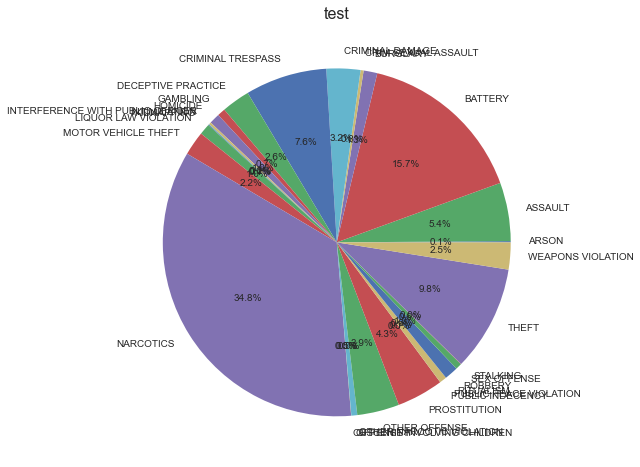

In [85]:
# plt.style.use(plt.style.available[9])
# plt.figure(figsize=(8,8))
# plt.pie(
#     df.groupby('Primary Type').sum()["Arrest"],
#     labels=df.groupby("Primary Type").sum().index,
#     radius=1, 
#     autopct='%0.1f%%', )
#     #explode=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
# plt.title('test', fontdict={'fontsize': 16})
# plt.show()

In [70]:
# df.loc[df['Year'] == 2002]

,ID,Date,Block,Primary Type,Location Description,Arrest,Ward,Year,Latitude,Longitude,Location
7459,1301,01/01/2002 05:25:00 PM,059XX S PRINCETON AVE,HOMICIDE,STREET,True,20.0,2002,41.786581,-87.632783,"(41.786580849, -87.632782985)"
7460,1302,01/02/2002 08:50:00 PM,011XX N KEYSTONE AVE,HOMICIDE,AUTO,False,27.0,2002,41.901451,-87.727494,"(41.901450966, -87.727494115)"
7462,1304,01/03/2002 12:17:00 AM,004XX W CHICAGO AVE,HOMICIDE,CHA ELEVATOR,False,27.0,2002,41.896525,-87.639212,"(41.89652481, -87.639211587)"
7464,1306,01/03/2002 06:14:00 PM,021XX N MAPLEWOOD AVE,HOMICIDE,AUTO,False,1.0,2002,41.920519,-87.691367,"(41.920519191, -87.691367018)"
7467,1309,01/05/2002 07:17:00 PM,059XX S ASHLAND AVE,HOMICIDE,GAS STATION,False,15.0,2002,41.786292,-87.664386,"(41.786291714, -87.664386014)"
...,...,...,...,...,...,...,...,...,...,...,...
999954,2567304,11/25/2002 12:00:00 PM,052XX W CHICAGO AVE,DECEPTIVE PRACTICE,SMALL RETAIL STORE,True,37.0,2002,41.894929,-87.755904,"(41.894928829, -87.755903553)"
999958,2567309,11/20/2002 02:00:00 PM,062XX N KENMORE AVE,THEFT,RESIDENCE,False,48.0,2002,41.995324,-87.656974,"(41.995323698, -87.656974008)"
999977,2567332,12/31/2002 06:00:00 PM,005XX N MICHIGAN AVE,CRIMINAL TRESPASS,SMALL RETAIL STORE,False,42.0,2002,41.892017,-87.624165,"(41.892017399, -87.624165306)"
999981,2567336,07/01/2002 12:00:00 PM,084XX S WOOD ST,OTHER OFFENSE,RESIDENCE,False,18.0,2002,41.740324,-87.668036,"(41.740323923, -87.668036437)"
